# 임포트

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers, Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Reshape

# MNIST

In [2]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255.
test_x = raw_test_x/255.

train_y = raw_train_y
test_y = raw_test_y

11501568/11490434 [==============================] - 0s 0us/step


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0

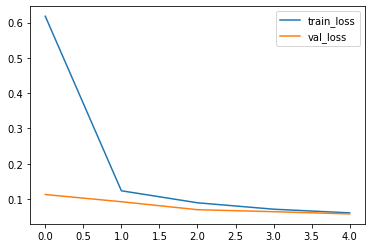

313/313 [==============================] - 1s 3ms/step - loss: 0.0585 - accuracy: 0.9820
loss = 0.05854449421167374
acc = 0.9819999933242798
[7 2 1 ... 4 5 6]


In [4]:
model = Sequential()
model.add(Input((28,28)))
model.add(Reshape((28,28,1)))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'val_loss'])
plt.show()

loss, acc = model.evaluate(test_x, test_y)
print('loss =', loss)
print('acc =', acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)
print(predicted)

# 패션 MNIST

In [5]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.fashion_mnist.load_data()

train_x = raw_train_x/255.
test_x = raw_test_x/255.

train_y = raw_train_y
test_y = raw_test_y

4431872/4422102 [==============================] - 0s 0us/step


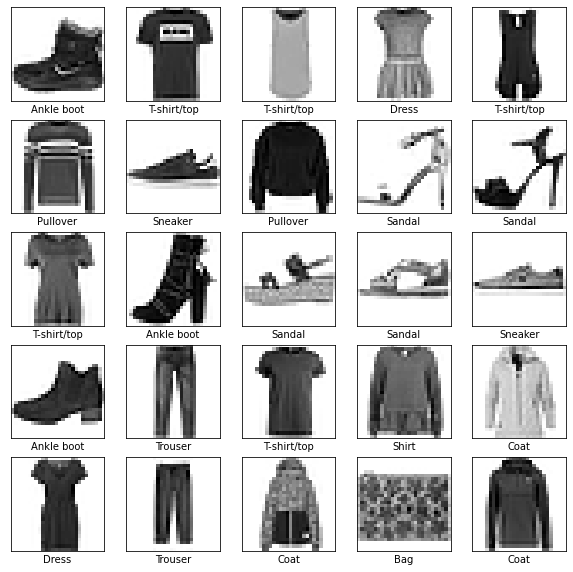

In [6]:
class_names =  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1) # 한줄에 5개, 5줄로 그린다. 그중에 i+1 번째칸에 그린다.
    plt.xticks([])       # 이미지 그릴때 가로축의 눈금 그리지 않는다.
    plt.yticks([])       # 이미지 그릴때 세로축의 눈금 그리지 않는다.
    plt.grid(False)      # 이미지 내의 눈금을 그리지 않는다.
    plt.imshow(raw_train_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[raw_train_y[i]])
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

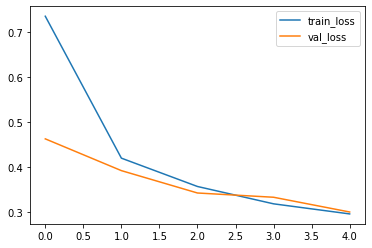

313/313 [==============================] - 1s 2ms/step - loss: 0.3111 - accuracy: 0.8912
loss = 0.3110601305961609
acc = 0.8912000060081482
[9 2 1 ... 8 1 5]


In [7]:
model = Sequential()
model.add(Input((28,28)))
model.add(Reshape((28,28,1)))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'val_loss'])
plt.show()

loss, acc = model.evaluate(test_x, test_y)
print('loss =', loss)
print('acc =', acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)
print(predicted)

# CIFAR10

In [22]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.cifar10.load_data()

train_x = raw_train_x/255.
test_x = raw_test_x/255.

train_y = raw_train_y
test_y = raw_test_y

In [9]:
print(raw_train_x.shape, raw_train_y.shape)
print(raw_test_x.shape, raw_test_y.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


## 데이터 살펴보기

In [10]:
print(raw_train_x[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [12]:
#카테고리 10개
print(np.unique(raw_train_y))

[0 1 2 3 4 5 6 7 8 9]


9 truck


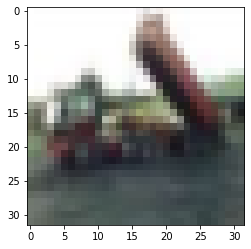

4 deer


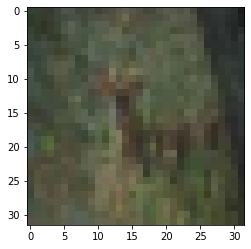

7 horse


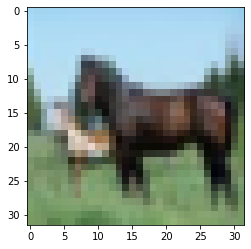

9 truck


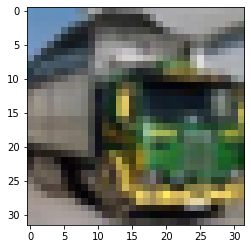

In [15]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]   #카테고리 이름

def show_sample(i):
  print(raw_train_y[i][0], labels[raw_train_y[i][0]])
  plt.imshow(raw_train_x[i])
  plt.show()

for i in [2,10,12,14]:
  show_sample(i)

## 모델 학습

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dense_6 (Dense)             (None, 10)               

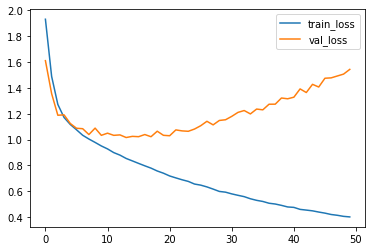

313/313 [==============================] - 1s 3ms/step - loss: 1.6399 - accuracy: 0.6228
loss = 1.6398512125015259
acc = 0.6227999925613403
[3 1 0 ... 5 9 7]


In [16]:
model = Sequential()
model.add(Input((32,32,3)))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(train_x, train_y, epochs=50, verbose=1, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'val_loss'])
plt.show()

loss, acc = model.evaluate(test_x, test_y)
print('loss =', loss)
print('acc =', acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)
print(predicted)

## PlotLosses, overfitting 방지

In [18]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

In [17]:
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, L1L2

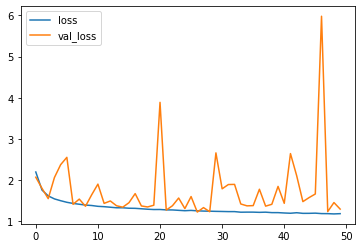

loss =  1.1851800680160522 , val_loss =  1.2958948612213135
352/352 [==============================] - 3s 8ms/step - loss: 1.1852 - accuracy: 0.5989 - val_loss: 1.2959 - val_accuracy: 0.5744


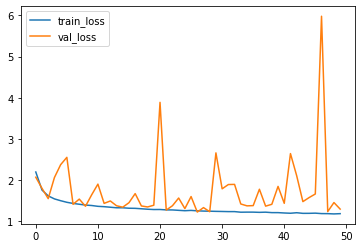

313/313 [==============================] - 1s 3ms/step - loss: 1.2903 - accuracy: 0.5842
loss = 1.2902600765228271
acc = 0.5842000246047974
[3 8 0 ... 5 1 7]


In [19]:
model = Sequential()
model.add(Input((32,32,3)))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(10, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

plot_losses = PlotLosses()
history = model.fit(train_x, train_y, epochs=50, verbose=1, batch_size=128, validation_split=0.1,
                    callbacks=[plot_losses])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'val_loss'])
plt.show()

loss, acc = model.evaluate(test_x, test_y)
print('loss =', loss)
print('acc =', acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)
print(predicted)

## Callbacks 다 적용

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

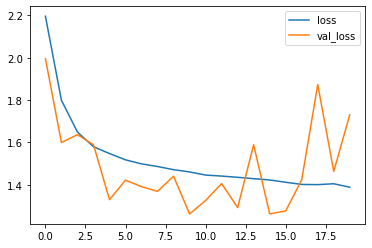

loss =  1.3882207870483398 , val_loss =  1.7307640314102173
352/352 [==============================] - 2s 6ms/step - loss: 1.3882 - accuracy: 0.5024 - val_loss: 1.7308 - val_accuracy: 0.4408 - lr: 0.0010
Epoch 20: early stopping


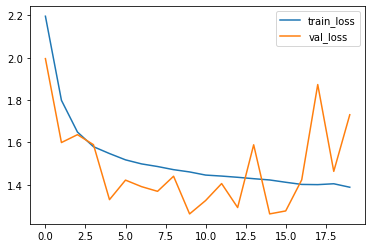

313/313 [==============================] - 1s 4ms/step - loss: 1.7252 - accuracy: 0.4495
loss = 1.725241780281067
acc = 0.4494999945163727
[8 8 8 ... 2 0 7]


In [23]:
model = Sequential()
model.add(Input((32,32,3)))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(10, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss',  save_best_only=True)
plot_losses = PlotLosses()
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_learning_rate=0.001)

callbacks = [model_check_point, plot_losses, early_stopping, reduce_lr]

history = model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=128, validation_split=0.1,
                    callbacks=callbacks)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'val_loss'])
plt.show()

loss, acc = model.evaluate(test_x, test_y)
print('loss =', loss)
print('acc =', acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)
print(predicted)